In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df =pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [3]:
df.duplicated('CustomerId').sum()

0

In [4]:
df=df.set_index('CustomerId')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [18]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [24]:
df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)

In [20]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [21]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [22]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [25]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [26]:
df.loc[(df[ 'Balance' ]==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

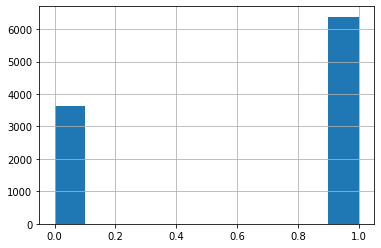

In [27]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)
df['Zero Balance'].hist()

In [28]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [29]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [30]:
X=df.drop(['Surname','Churn'],axis=1)
y=df['Churn']
X.shape,y.shape

((10000, 11), (10000,))

In [31]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=202529)
X_rus,y_rus= rus.fit_resample(X,y)
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [32]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [33]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

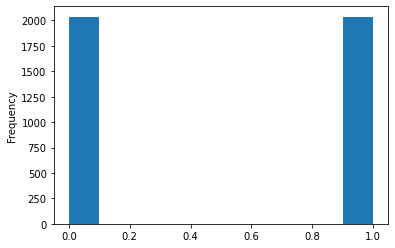

In [34]:
y_rus.plot(kind='hist')

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=202529)
X_ros,y_ros= ros.fit_resample(X,y)
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [36]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [37]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

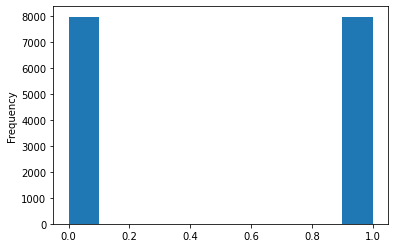

In [38]:
y_ros.plot(kind='hist')

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state = 202529)
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,train_size=0.3,random_state = 202529)
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,train_size=0.3,random_state = 202529)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [43]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [44]:
y_pred=svc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[5490,  107],
       [1024,  379]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      5597
           1       0.78      0.27      0.40      1403

    accuracy                           0.84      7000
   macro avg       0.81      0.63      0.65      7000
weighted avg       0.83      0.84      0.81      7000



In [46]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [47]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [48]:
grid_predictions=grid.predict(X_test)
confusion_matrix(y_test,grid_predictions)

array([[5213,  384],
       [ 966,  437]])

In [49]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      5597
           1       0.53      0.31      0.39      1403

    accuracy                           0.81      7000
   macro avg       0.69      0.62      0.64      7000
weighted avg       0.78      0.81      0.79      7000



In [50]:
svc_rus=SVC()
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [51]:
y_pred_rus=svc_rus.predict(X_test_rus)
confusion_matrix(y_test_rus,y_pred_rus)

array([[1092,  337],
       [ 425,  998]])

In [52]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1429
           1       0.75      0.70      0.72      1423

    accuracy                           0.73      2852
   macro avg       0.73      0.73      0.73      2852
weighted avg       0.73      0.73      0.73      2852



In [53]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [54]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [55]:
grid_predictions_rus=grid_rus.predict(X_test_rus)
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[1089,  340],
       [ 419, 1004]])

In [56]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1429
           1       0.75      0.71      0.73      1423

    accuracy                           0.73      2852
   macro avg       0.73      0.73      0.73      2852
weighted avg       0.73      0.73      0.73      2852



In [57]:
svc_ros=SVC()
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [58]:
y_pred_ros=svc_ros.predict(X_test_ros)
confusion_matrix(y_test_ros,y_pred_ros)

array([[4202, 1410],
       [1359, 4178]])

In [59]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      5612
           1       0.75      0.75      0.75      5537

    accuracy                           0.75     11149
   macro avg       0.75      0.75      0.75     11149
weighted avg       0.75      0.75      0.75     11149



In [60]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [61]:
print(grid_ros.best_estimator_)
grid_predictions_ros=grid_ros.predict(X_test_ros)
confusion_matrix(y_test_ros,grid_predictions_ros)

SVC(C=1, class_weight='balanced', gamma=1)


array([[4555, 1057],
       [ 991, 4546]])

In [62]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5612
           1       0.81      0.82      0.82      5537

    accuracy                           0.82     11149
   macro avg       0.82      0.82      0.82     11149
weighted avg       0.82      0.82      0.82     11149



In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      5597
           1       0.78      0.27      0.40      1403

    accuracy                           0.84      7000
   macro avg       0.81      0.63      0.65      7000
weighted avg       0.83      0.84      0.81      7000



In [64]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      5597
           1       0.53      0.31      0.39      1403

    accuracy                           0.81      7000
   macro avg       0.69      0.62      0.64      7000
weighted avg       0.78      0.81      0.79      7000



In [65]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1429
           1       0.75      0.70      0.72      1423

    accuracy                           0.73      2852
   macro avg       0.73      0.73      0.73      2852
weighted avg       0.73      0.73      0.73      2852



In [66]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1429
           1       0.75      0.71      0.73      1423

    accuracy                           0.73      2852
   macro avg       0.73      0.73      0.73      2852
weighted avg       0.73      0.73      0.73      2852



In [67]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      5612
           1       0.75      0.75      0.75      5537

    accuracy                           0.75     11149
   macro avg       0.75      0.75      0.75     11149
weighted avg       0.75      0.75      0.75     11149



In [68]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5612
           1       0.81      0.82      0.82      5537

    accuracy                           0.82     11149
   macro avg       0.82      0.82      0.82     11149
weighted avg       0.82      0.82      0.82     11149

